In [1]:
#Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("A15-EastWestAirlines.xlsx")
df

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID


In [3]:
# Load actual dataset
df = pd.read_excel("A15-EastWestAirlines.xlsx", sheet_name=1)
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
# Drop ID column (not useful for clustering)
df = df.drop('ID#', axis=1)
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
# Check missing values
df.isnull().sum()


Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(df), columns = df.columns)


In [7]:
scaled_df.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3.999000e+03,3999.000000,3.999000e+03,3.999000e+03,3.999000e+03
mean,2.842882e-17,6.574164e-17,1.705729e-16,3.038330e-16,1.350369e-16,-2.842882e-17,-7.817925e-17,0.000000,1.776801e-17,5.685763e-17,1.421441e-17
std,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125e+00,1.000125,1.000125e+00,1.000125e+00,1.000125e+00
min,-7.304396e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-7.099918e-01,-1.208203e+00,-0.328603,-3.621679e-01,-1.993611e+00,-7.669193e-01
25%,-5.465676e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-6.582276e-01,-8.957878e-01,-0.328603,-3.621679e-01,-8.661823e-01,-7.669193e-01
50%,-3.027332e-01,-1.862987e-01,-7.695784e-01,-9.824189e-02,-6.276658e-02,-4.130308e-01,4.145743e-02,-0.328603,-3.621679e-01,-1.092530e-02,-7.669193e-01
75%,1.866028e-01,-1.862987e-01,6.831212e-01,-9.824189e-02,-6.276658e-02,2.756198e-01,5.621492e-01,-0.106466,-9.850333e-02,8.097050e-01,1.303918e+00
max,1.618884e+01,1.422486e+01,2.135821e+00,1.344898e+01,2.042732e+01,1.020957e+01,7.747696e+00,21.683004,1.361205e+01,2.023095e+00,1.303918e+00


In [8]:
scaled_df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


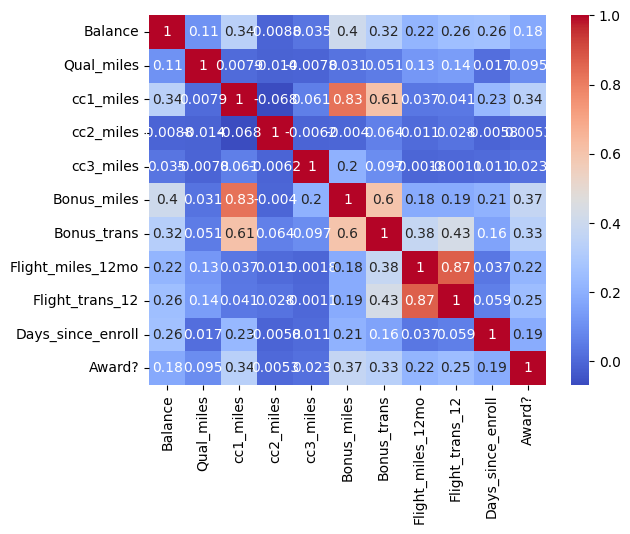

In [9]:
# Correlation Heatmap
sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.show()

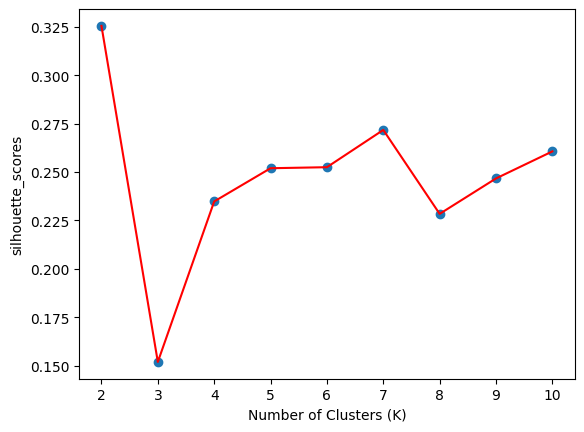

In [10]:
# K-Means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
""""
values = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(scaled_df)
    values.append(km.inertia_)
    
plt.plot(range(1,11), values, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()
"""
scores = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    scores.append(silhouette_score(scaled_df,model.fit_predict(scaled_df)))
    
  
import matplotlib.pyplot as plt
plt.scatter(x=range(2,11),y=scores)
plt.plot(range(2,11),scores,color='red')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('silhouette_scores')
plt.show()


In [11]:
# Final K-Means (K = 4)
from sklearn.metrics import silhouette_score

km_final = KMeans(n_clusters=4)
kmeans_labels = km_final.fit_predict(scaled_df)

score = silhouette_score(scaled_df, kmeans_labels)
print("Silhouette Score for K=4:", score)


Silhouette Score for K=4: 0.3073829307433179


In [12]:
# Add K-Means labels to dataset
df['KMeans_Cluster'] = kmeans_labels

df.groupby('KMeans_Cluster').mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
KMeans_Cluster,,,,,,,,,,,
0,116097.747853,136.293521,3.694770,1.002342,1.001561,38946.225605,18.719750,327.615144,0.976581,4881.766589,0.641686
1,43493.948221,94.477866,1.213834,1.019368,1.000395,4628.551779,6.882213,199.167984,0.619763,3689.742292,0.201976
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,193640.947977,933.589595,2.196532,1.034682,1.000000,32098.098266,26.491329,5251.982659,15.317919,4695.491329,0.809249


In [13]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(scaled_df)

# DBSCAN Clustering
pd.Series(db_labels).value_counts()


 0    2227
 1     956
-1     776
 3      12
 7       7
 2       6
 6       6
 4       5
 5       4
Name: count, dtype: int64

In [14]:
# Calculate only if more than one valid cluster exists
if len(set(db_labels)) > 1 and -1 in db_labels:
    sil_dbscan = silhouette_score(scaled_df[db_labels != -1],
                                  db_labels[db_labels != -1])
    print("Silhouette Score (DBSCAN):", sil_dbscan)
else:
    print("Silhouette score cannot be calculated")


Silhouette Score (DBSCAN): 0.22748003209128081


In [15]:
# Add DBSCAN labels
df['DBSCAN_Cluster'] = db_labels

df.groupby('DBSCAN_Cluster').mean()


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,KMeans_Cluster
DBSCAN_Cluster,,,,,,,,,,,,
-1,161634.467784,717.893041,2.657216,1.046392,1.063144,36198.028351,20.451031,1865.292526,5.426546,4670.824742,0.66366,0.985825
0,50878.344410,0.673552,1.636731,1.000000,1.000000,8637.251908,8.150427,92.213740,0.306242,3789.942075,0.00000,0.841940
1,55080.808577,2.092050,2.547071,1.000000,1.000000,21197.231172,12.234310,189.577406,0.610879,4469.053347,1.00000,0.435146
2,271963.166667,0.000000,5.000000,1.000000,1.000000,64239.500000,16.666667,666.666667,1.500000,5709.333333,1.00000,0.000000
3,34516.083333,0.000000,1.000000,2.000000,1.000000,8048.333333,11.916667,0.000000,0.000000,3407.416667,0.00000,1.000000
4,33354.600000,0.000000,1.000000,3.000000,1.000000,14966.000000,14.200000,50.000000,0.200000,4205.000000,0.00000,1.000000
5,57404.500000,0.000000,5.000000,1.000000,1.000000,70048.000000,30.250000,262.500000,0.750000,4100.250000,1.00000,0.000000
6,27786.666667,2621.500000,1.000000,1.000000,1.000000,1587.500000,1.500000,66.666667,0.500000,1841.000000,0.00000,1.000000
7,47279.000000,0.000000,3.000000,1.000000,1.000000,18041.857143,33.571429,0.000000,0.000000,1332.285714,0.00000,0.000000


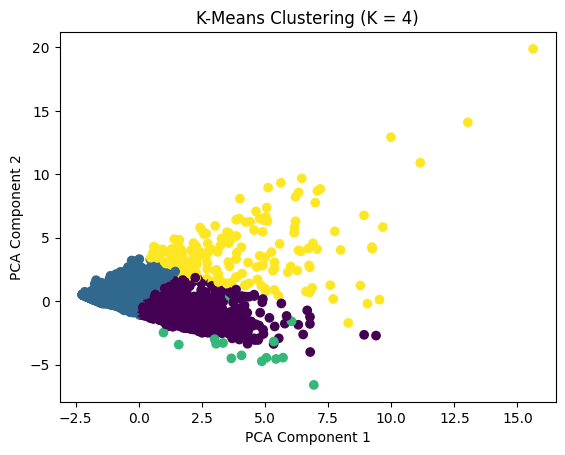

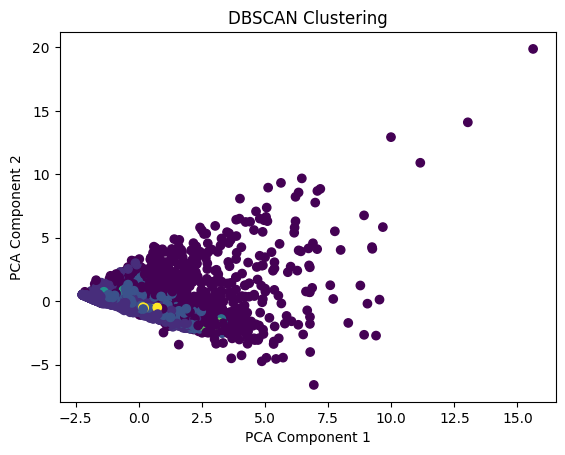

In [16]:
# PCA for Visualization

from sklearn.decomposition import PCA

# Reduce dimensions only for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# K-Means Visualization
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Clustering (K = 4)")
plt.show()


# DBSCAN Visualization
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=db_labels)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("DBSCAN Clustering")
plt.show()

In [18]:
#Create Visualization DataFrame
data_vis = pd.DataFrame({
    'PCA1': pca_data[:, 0],
    'PCA2': pca_data[:, 1],
    'KMeans_Cluster': kmeans_labels,
    'DBSCAN_Cluster': db_labels
})

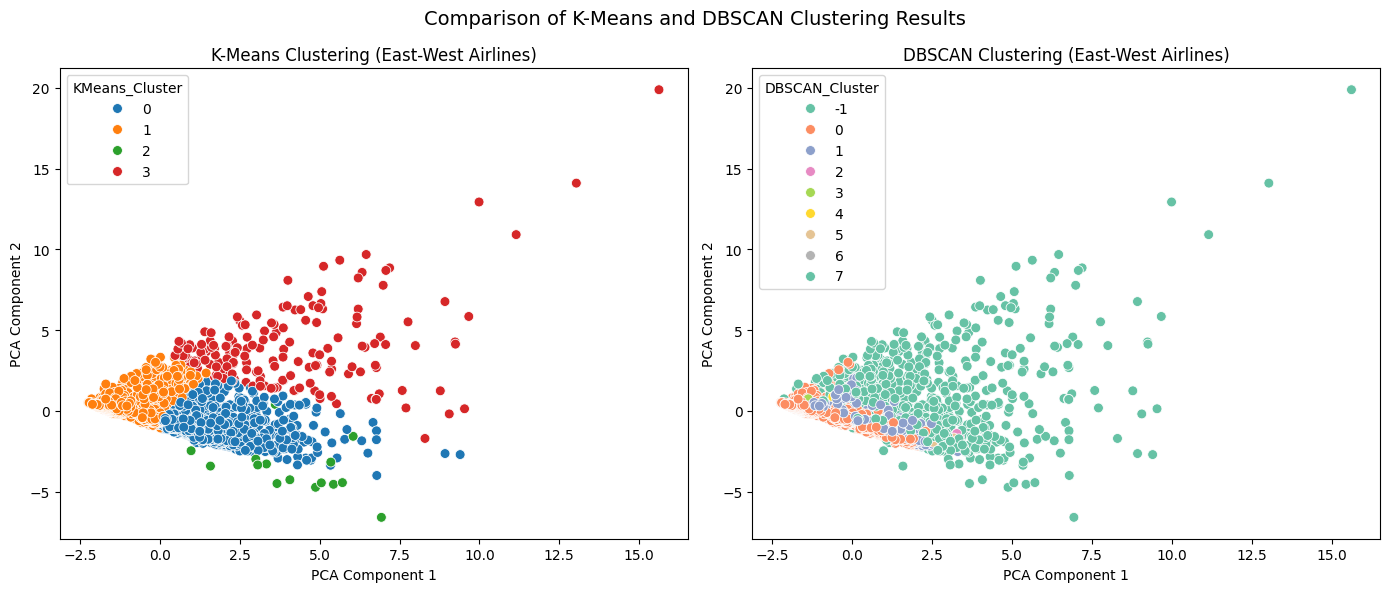

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# K-Means Plot
sns.scatterplot(data=data_vis, x='PCA1', y='PCA2', hue='KMeans_Cluster', palette='tab10', s=50, ax=axes[0])
axes[0].set_title("K-Means Clustering (East-West Airlines)")
axes[0].set_xlabel("PCA Component 1")
axes[0].set_ylabel("PCA Component 2")

# DBSCAN Plot
sns.scatterplot( data=data_vis, x='PCA1', y='PCA2', hue='DBSCAN_Cluster', palette='Set2', s=50, ax=axes[1])
axes[1].set_title("DBSCAN Clustering (East-West Airlines)")
axes[1].set_xlabel("PCA Component 1")
axes[1].set_ylabel("PCA Component 2")

plt.suptitle("Comparison of K-Means and DBSCAN Clustering Results", fontsize=14)
plt.tight_layout()
plt.show()
